# **Autoencoders:**

# **1. A**

Loading MNIST dataset...
Training autoencoder models...
Creating autoencoder model...
Creating autoencoder model...
Calculating reconstruction errors...
313/313 [==============================] - 1s 2ms/step
Displaying reconstructions...
Autoencoder with hidden dimension 32
1/1 [==============================] - 0s 32ms/step


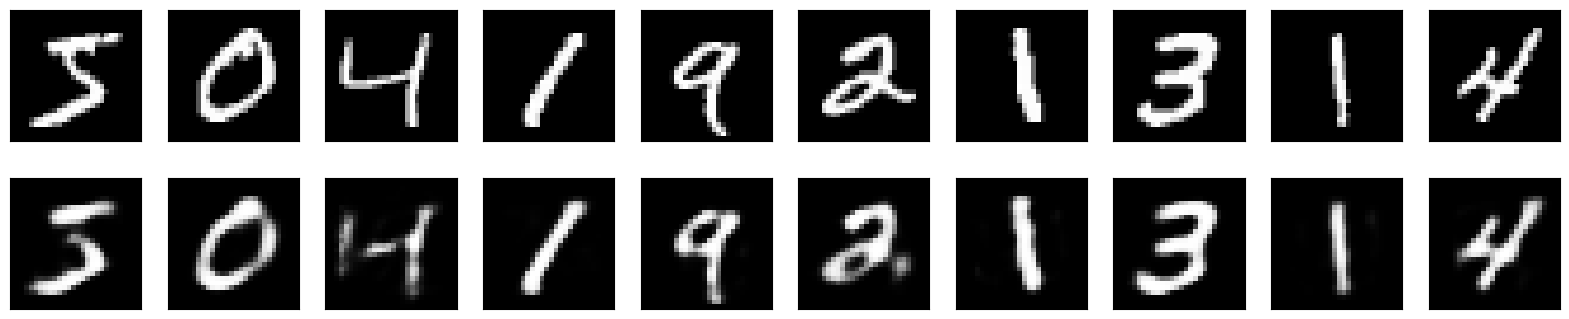

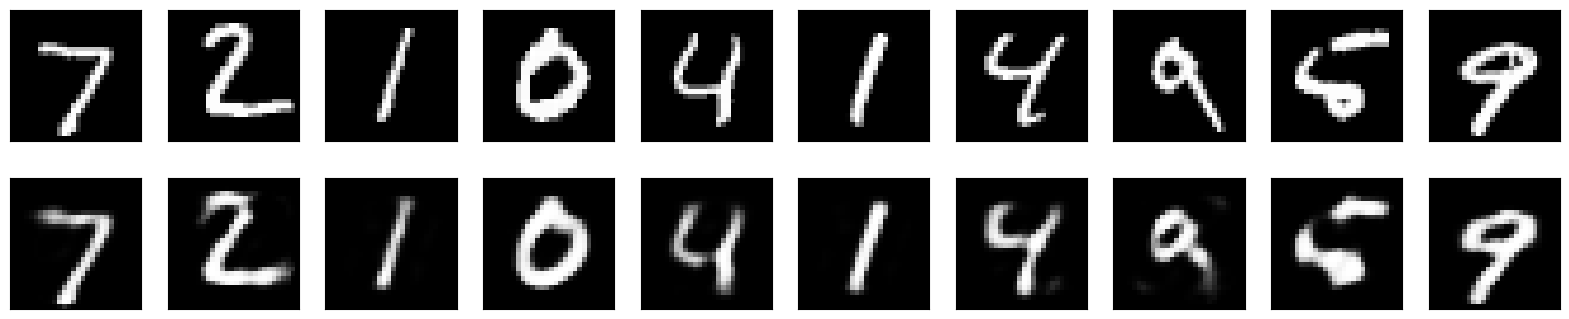

Train Reconstruction Error (Hidden Dim 32): 0.010146871209144592
Test Reconstruction Error (Hidden Dim 32): 0.009853280149400234

Autoencoder with hidden dimension 64
1/1 [==============================] - 0s 33ms/step


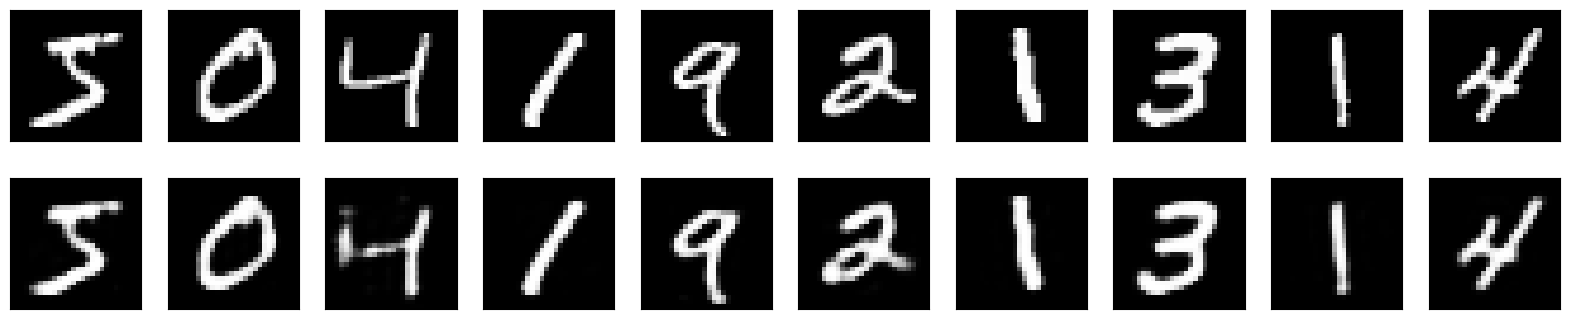

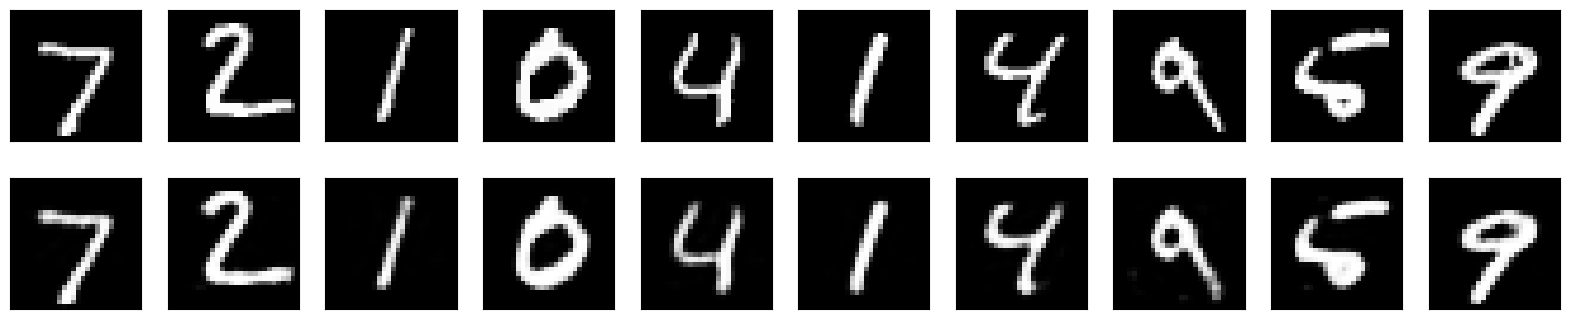

Train Reconstruction Error (Hidden Dim 64): 0.0039474815130233765
Test Reconstruction Error (Hidden Dim 64): 0.0038682392332702875



In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt

# Load MNIST dataset
print("Loading MNIST dataset...")
(train_images, _), (test_images, _) = mnist.load_data()

# Normalize pixel values
train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.

# Reshape images
train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))

# Function for creating the autoencoder model
def create_autoencoder(hidden_dim):
    print("Creating autoencoder model...")
    input_img = Input(shape=(784,))
    encoded = Dense(hidden_dim, activation='relu')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder

# Train autoencoder models
hidden_dims = [32, 64]
autoencoder_models = []

print("Training autoencoder models...")
for dim in hidden_dims:
    autoencoder = create_autoencoder(dim)
    autoencoder.fit(train_images, train_images, epochs=20, batch_size=256, shuffle=True,
                    validation_data=(test_images, test_images), verbose=0)
    autoencoder_models.append(autoencoder)

# Calculate reconstruction errors
train_errors = []
test_errors = []

print("Calculating reconstruction errors...")
for autoencoder in autoencoder_models:
    train_reconstructions = autoencoder.predict(train_images)
    train_error = np.mean(np.square(train_reconstructions - train_images))
    train_errors.append(train_error)

    test_reconstructions = autoencoder.predict(test_images)
    test_error = np.mean(np.square(test_reconstructions - test_images))
    test_errors.append(test_error)

# Display reconstructions
n_images = 10

print("Displaying reconstructions...")
for i, autoencoder in enumerate(autoencoder_models):
    print(f"Autoencoder with hidden dimension {hidden_dims[i]}")
    train_reconstructions = autoencoder.predict(train_images[:n_images])
    test_reconstructions = autoencoder.predict(test_images[:n_images])

    plt.figure(figsize=(20, 4))
    for j in range(n_images):
        # Display original images
        ax = plt.subplot(2, n_images, j + 1)
        plt.imshow(train_images[j].reshape(28, 28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstructed images
        ax = plt.subplot(2, n_images, j + 1 + n_images)
        plt.imshow(train_reconstructions[j].reshape(28, 28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

    plt.figure(figsize=(20, 4))
    for j in range(n_images):
        # Display original images

        ax = plt.subplot(2, n_images, j + 1)
        plt.imshow(test_images[j].reshape(28, 28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstructed images

        ax = plt.subplot(2, n_images, j + 1 + n_images)
        plt.imshow(test_reconstructions[j].reshape(28, 28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

    print(f"Train Reconstruction Error (Hidden Dim {hidden_dims[i]}): {train_errors[i]}")
    print(f"Test Reconstruction Error (Hidden Dim {hidden_dims[i]}): {test_errors[i]}\n")

# **1.B**

Interpolation between samples 0 and 1:
1/1 [==============================] - 0s 58ms/step


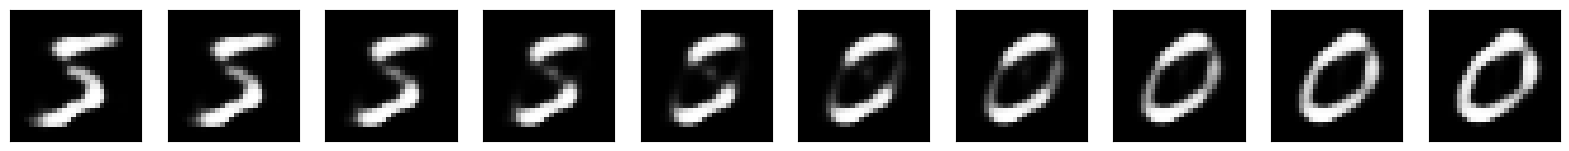

1/1 [==============================] - 0s 21ms/step


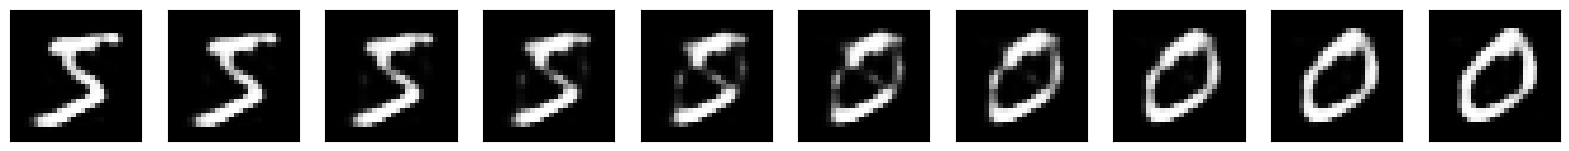

Interpolation between samples 2 and 3:
1/1 [==============================] - 0s 21ms/step


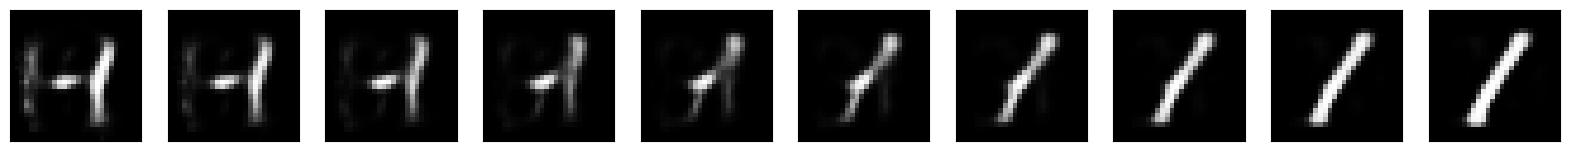

1/1 [==============================] - 0s 30ms/step


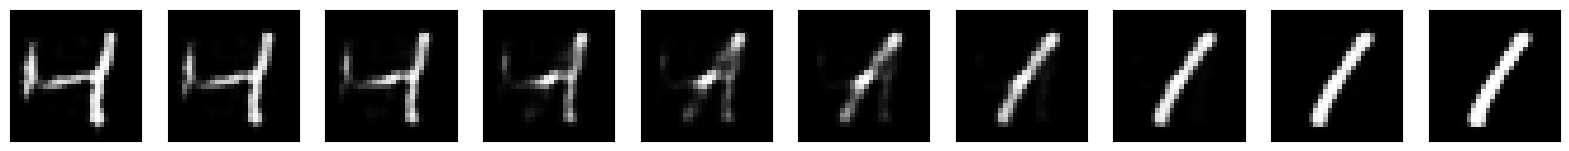

Interpolation between samples 4 and 5:
1/1 [==============================] - 0s 40ms/step


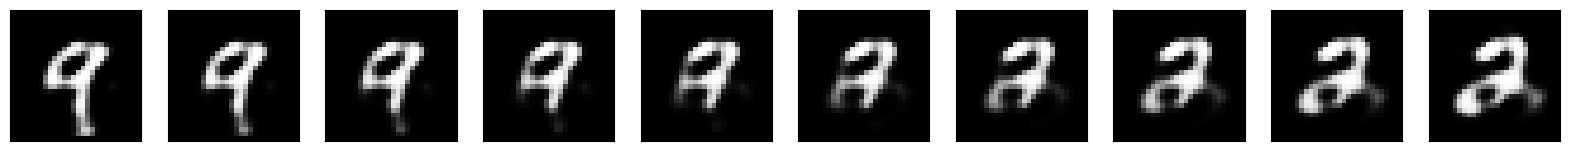

1/1 [==============================] - 0s 33ms/step


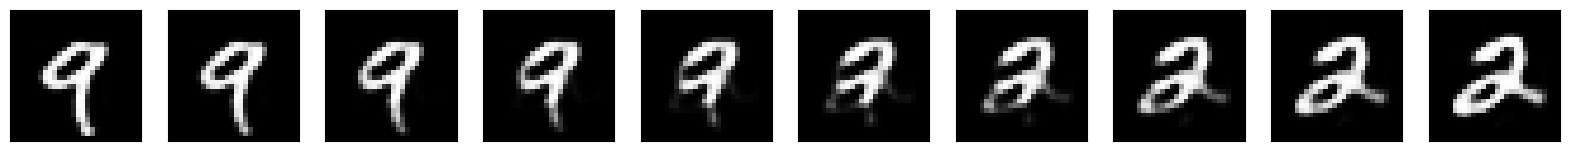

Interpolation between samples 6 and 7:
1/1 [==============================] - 0s 27ms/step


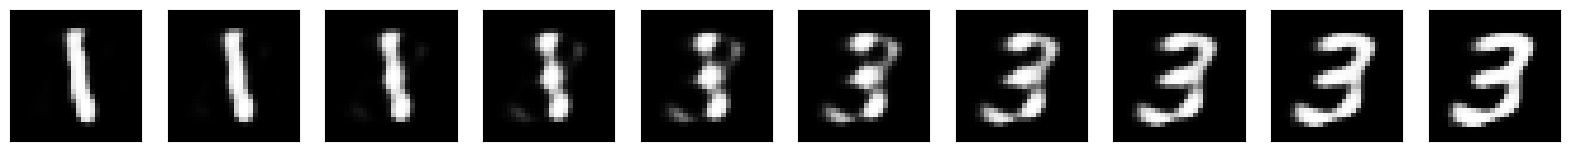

1/1 [==============================] - 0s 21ms/step


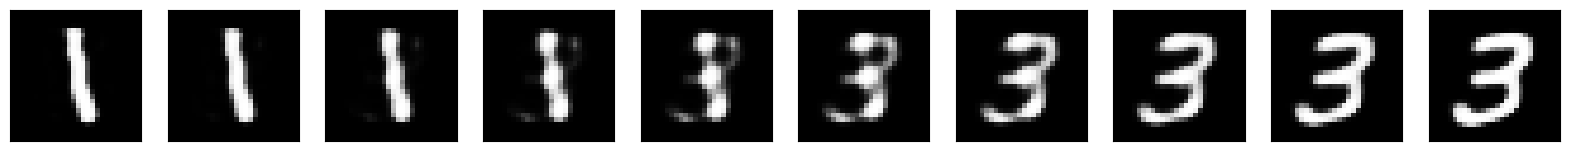

Interpolation between samples 8 and 9:
1/1 [==============================] - 0s 33ms/step


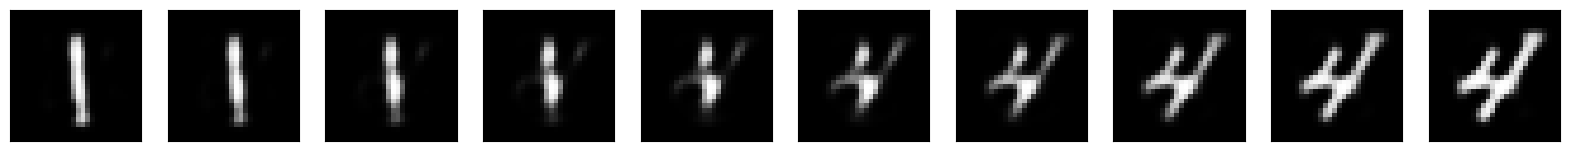

1/1 [==============================] - 0s 24ms/step


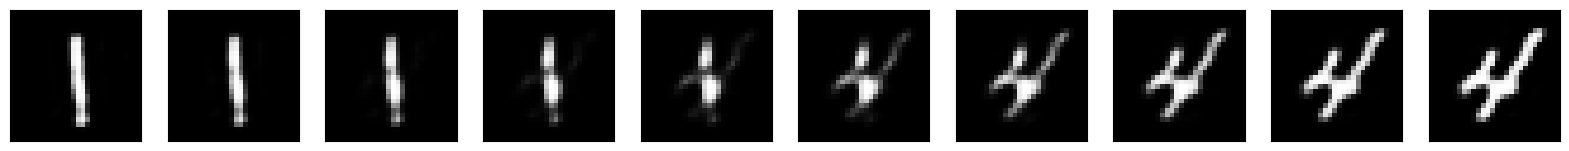

In [4]:
# Function to create an encoder model
def create_encoder(autoencoder_model):
    return Model(autoencoder_model.input, autoencoder_model.layers[1].output)

# Function to create a decoder model
def create_decoder(autoencoder_model):
    return Model(autoencoder_model.layers[2].input, autoencoder_model.layers[2].output)

# Function to perform reconstruction on the line joining two samples in the hidden space
def interpolate_and_reconstruct(autoencoder, sample1, sample2, steps=10):
    encoder_model = create_encoder(autoencoder)
    decoder_model = create_decoder(autoencoder)

    # Encode samples into hidden space
    encoded_sample1 = encoder_model.predict(sample1.reshape(1, -1))
    encoded_sample2 = encoder_model.predict(sample2.reshape(1, -1))

    # Interpolate between the encoded representations
    interpolated_points = []
    for i in range(steps):
        interpolated_point = encoded_sample1 + (encoded_sample2 - encoded_sample1) * (i / (steps - 1))
        interpolated_points.append(interpolated_point)

    # Decode interpolated points back into input space
    reconstructed_images = []
    for point in interpolated_points:
        reconstructed_image = decoder_model.predict(point)
        reconstructed_images.append(reconstructed_image)

    return np.array(reconstructed_images).reshape(-1, 28, 28)

# Select at least 5 pairs of samples from the training dataset
sample_pairs_indices = [(0, 1), (2, 3), (4, 5), (6, 7), (8, 9)]

# Perform interpolation and reconstruction for each pair
for pair_indices in sample_pairs_indices:
    sample1 = train_images[pair_indices[0]]
    sample2 = train_images[pair_indices[1]]

    print(f"Interpolation between samples {pair_indices[0]} and {pair_indices[1]}:")

    for i, autoencoder in enumerate(autoencoder_models):
        reconstructed_images = interpolate_and_reconstruct(autoencoder, sample1, sample2)

        plt.figure(figsize=(20, 2))
        for j, image in enumerate(reconstructed_images):
            ax = plt.subplot(1, len(reconstructed_images), j + 1)
            plt.imshow(image, cmap='gray')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

        plt.show()

# **2. Variational Autoencoder**

Epoch 1/50
469/469 [==============================] - 16s 23ms/step - loss: 172.4045 - val_loss: 133.3384
Epoch 2/50
469/469 [==============================] - 8s 17ms/step - loss: 127.6330 - val_loss: 121.5432
Epoch 3/50
469/469 [==============================] - 11s 23ms/step - loss: 120.0224 - val_loss: 116.8722
Epoch 4/50
469/469 [==============================] - 10s 22ms/step - loss: 116.3324 - val_loss: 113.8826
Epoch 5/50
469/469 [==============================] - 9s 19ms/step - loss: 113.9313 - val_loss: 112.0812
Epoch 6/50
469/469 [==============================] - 9s 19ms/step - loss: 112.3571 - val_loss: 110.7706
Epoch 7/50
469/469 [==============================] - 10s 21ms/step - loss: 111.1674 - val_loss: 109.7719
Epoch 8/50
469/469 [==============================] - 9s 18ms/step - loss: 110.2532 - val_loss: 109.1036
Epoch 9/50
469/469 [==============================] - 8s 17ms/step - loss: 109.4946 - val_loss: 108.4324
Epoch 10/50
469/469 [==============================

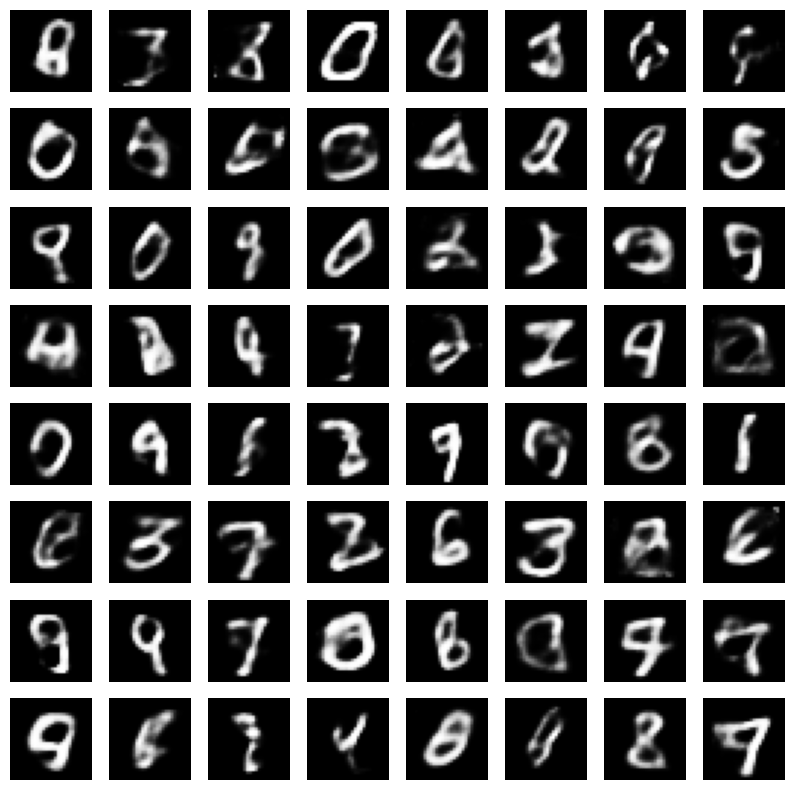

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

# Load MNIST dataset
(train_images, _), (test_images, _) = mnist.load_data()

# Normalize pixel values
train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.

# Flatten images
train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))

# Define the VAE architecture
latent_dim = 16

# Encoder
input_img = Input(shape=(784,))
x = Dense(256, activation='relu')(input_img)
z_mean = Dense(latent_dim)(x)
z_log_var = Dense(latent_dim)(x)

# Sampling function
def sample_latent_variable(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=1.0)
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Lambda(sample_latent_variable, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder
decoder_input = Input(shape=(latent_dim,))
x = Dense(256, activation='relu')(decoder_input)
decoded_output = Dense(784, activation='sigmoid')(x)

# Instantiate encoder and decoder models
encoder = Model(input_img, [z_mean, z_log_var, z], name='encoder')
decoder = Model(decoder_input, decoded_output, name='decoder')

# VAE model
output = decoder(encoder(input_img)[2])
vae = Model(input_img, output, name='vae')

# Define VAE loss
reconstruction_loss = tf.keras.losses.binary_crossentropy(input_img, output)
reconstruction_loss *= 784  # flatten image size
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)

# Compile VAE model
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

# Train VAE model
vae.fit(train_images, epochs=50, batch_size=128, validation_data=(test_images, None))

# Generate images
n_to_generate = 64
z_samples = np.random.normal(size=(n_to_generate, latent_dim))
generated_images = decoder.predict(z_samples)

# Display generated images
plt.figure(figsize=(10, 10))
for i in range(n_to_generate):
    ax = plt.subplot(8, 8, i + 1)
    plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()